# Machine Learning Prediction

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler

#### Load our clean dataset

In [2]:
df = pd.read_csv('datasets/cleaned_airbnb_pricelist.csv')
df.head()

,host_id,host_since,name,neighbourhood,property_type,room_type,beds,number_of_reviews,price,review_scores_rating,date_difference,year
0,5162530,2015-08-31,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,Entire home/apt,1.0,0,145,92.050565,0 days,2015
1,33134899,2015-08-31,"Sunny, Private room in Bushwick",Brooklyn,Apartment,Private room,1.0,1,37,92.050565,0 days,2015
2,39608626,2015-08-31,Sunny Room in Harlem,Manhattan,Apartment,Private room,1.0,1,28,92.050565,0 days,2015
3,500,2008-06-26,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,Entire home/apt,3.0,0,199,92.050565,2622 days,2008
4,500,2008-06-26,Trendy Times Square Loft,Manhattan,Apartment,Private room,3.0,39,549,96.000000,2622 days,2008


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30478 entries, 0 to 30477
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   host_id               30478 non-null  int64  
 1   host_since            30478 non-null  object 
 2   name                  30478 non-null  object 
 3   neighbourhood         30478 non-null  object 
 4   property_type         30478 non-null  object 
 5   room_type             30478 non-null  object 
 6   beds                  30478 non-null  float64
 7   number_of_reviews     30478 non-null  int64  
 8   price                 30478 non-null  object 
 9   review_scores_rating  30478 non-null  float64
 10  date_difference       30478 non-null  object 
 11  year                  30478 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 2.8+ MB


#### Feature Engineering

* Drop unnecessary columns
* Create day & month columns from host_since & drop it
* Encode the categorical columns - neighbourhood, property_type, room_type
* Convert date_difference to numerical data type
* Convert the price from string to int 

In [4]:
# Dropping unnecessary columns
df = df.drop(['host_id', 'name'], axis=1)

In [5]:
# Create date & month columns from host_since & drop it
df['month'] = pd.DatetimeIndex(df['host_since']).month
df['day'] = pd.DatetimeIndex(df['host_since']).day

In [6]:
df = df.drop(['host_since'], axis=1)

In [7]:
# Convert date_difference to numerical
df['date_difference'] = df['date_difference'].str.replace(' days', '')
df.head()

,neighbourhood,property_type,room_type,beds,number_of_reviews,price,review_scores_rating,date_difference,year,month,day
0,Brooklyn,Apartment,Entire home/apt,1.0,0,145,92.050565,0,2015,8,31
1,Brooklyn,Apartment,Private room,1.0,1,37,92.050565,0,2015,8,31
2,Manhattan,Apartment,Private room,1.0,1,28,92.050565,0,2015,8,31
3,Manhattan,Apartment,Entire home/apt,3.0,0,199,92.050565,2622,2008,6,26
4,Manhattan,Apartment,Private room,3.0,39,549,96.000000,2622,2008,6,26


In [8]:
# Change the date difference data type to an integer
df.date_difference = df.date_difference.astype('int')
df.date_difference.dtype

dtype('int64')

In [9]:
# Encoding our categorical columns
categorical_columns = ['neighbourhood', 'property_type', 'room_type']
df.neighbourhood.nunique(), df.neighbourhood.unique()

(5,
 array(['Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'Staten Island'],
       dtype=object))

In [10]:
df.property_type.nunique(), df.property_type.unique()

(19,
 array(['Apartment', 'House', 'Other', 'Bed & Breakfast', 'Loft',
        'Condominium', 'Townhouse', 'Dorm', 'Boat', 'Cabin', 'Villa',
        'Bungalow', 'Camper/RV', 'Treehouse', 'Tent', 'Hut', 'Lighthouse',
        'Chalet', 'Castle'], dtype=object))

In [11]:
df.room_type.nunique(), df.room_type.unique()

(3, array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object))

In [12]:
# Encode our categorical data
le = LabelEncoder()

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

df.head()

,neighbourhood,property_type,room_type,beds,number_of_reviews,price,review_scores_rating,date_difference,year,month,day
0,1,0,0,1.0,0,145,92.050565,0,2015,8,31
1,1,0,1,1.0,1,37,92.050565,0,2015,8,31
2,2,0,1,1.0,1,28,92.050565,0,2015,8,31
3,2,0,0,3.0,0,199,92.050565,2622,2008,6,26
4,2,0,1,3.0,39,549,96.000000,2622,2008,6,26


In [13]:
df.property_type.nunique(), df.property_type.unique()

(19,
 array([ 0, 10, 14,  1, 13,  8, 16,  9,  2,  4, 18,  3,  5, 17, 15, 11, 12,
         7,  6]))

In [14]:
# Convert the price from string to int
df.price = df.price.str.replace(',', '')
df.price = df.price.astype(int)

#### Correlation matrix

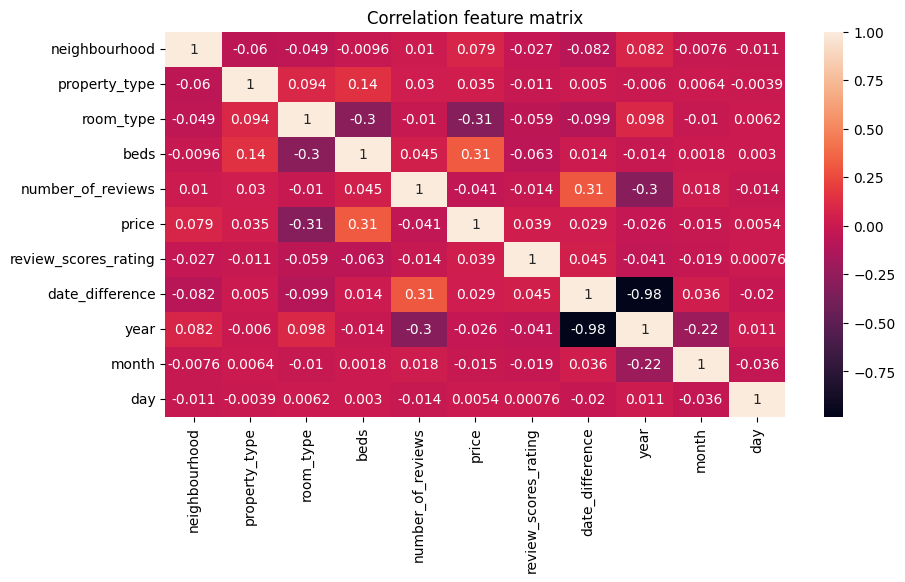

In [15]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation feature matrix')
plt.show()

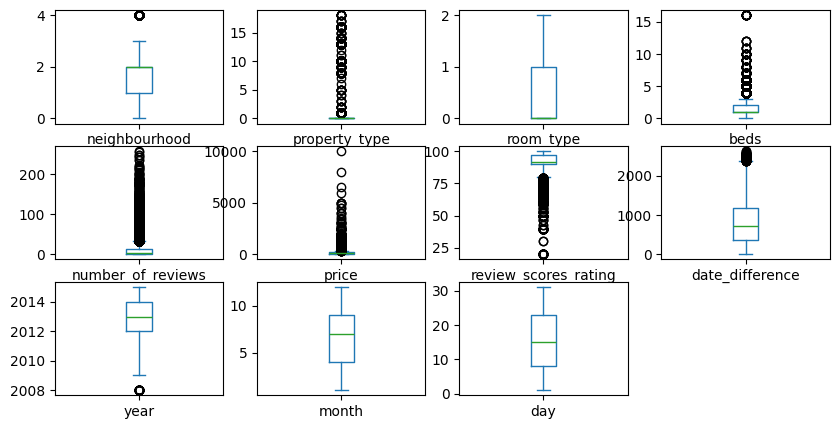

In [16]:
# box plot to visualize outliers
df.plot(kind='box', subplots=True,figsize=(10,5),layout=(3,4))
plt.show()

#### Feature Selection

In [28]:
new_df = df.copy()

In [29]:
new_df = new_df.drop(['day', 'year', 'month','number_of_reviews'], axis = 1)

In [30]:
new_df.head()

,neighbourhood,property_type,room_type,beds,price,review_scores_rating,date_difference
0,1,0,0,1.0,145,92.050565,0
1,1,0,1,1.0,37,92.050565,0
2,2,0,1,1.0,28,92.050565,0
3,2,0,0,3.0,199,92.050565,2622
4,2,0,1,3.0,549,96.000000,2622


#### Training our model

We've decided: 
- target -> price
- features -> neighbourhood, property_type, room_type, beds, number_of_reviews, price, date_difference

Steps:
1. Selection of target & features
2. Split the train & test data
3. Choose our algorithm
4. Standardize data (if we have to)
5. Initialize our model
6. Train our model
7. Predict
8. Evaluation of our model performance
9. Check how to improve performance

### Handling outliers

We'll use the quantile based flooring and capping approach

In [86]:
# Computing 10th, 90th percentiles and replacing the outlier treatment in python
# for col in X:
#     for val in col:
#         tenth_percentile = np.percentile(val, 10) 
#         ninetieth_percentile = np.percentile(val, 90) 
#         col = np.where(val<tenth_percentile, tenth_percentile, val) 
#         col = np.where(val>ninetieth_percentile, ninetieth_percentile, val)

In [87]:
# Define the lower and upper limits for each column and filter the DataFrame
def filter_outliers(df, lower_percentile=0.1, upper_percentile=0.9):
    df_filtered = df.copy()  # Make a copy of the DataFrame
    
    for column in df.columns:
        # Calculate the lower and upper limits for the column
        lower_limit = df[column].quantile(lower_percentile)
        upper_limit = df[column].quantile(upper_percentile)
        
        # Apply filtering using the calculated limits
        df_filtered = df_filtered.loc[(df_filtered[column] >= lower_limit) & (df_filtered[column] <= upper_limit)]
    
    return df_filtered

In [94]:
new_df = filter_outliers(new_df)
new_df.head()

,neighbourhood,property_type,room_type,beds,price,review_scores_rating,date_difference
3044,1,0,0,2.0,92,100.000000,1532
3045,1,0,0,1.0,120,92.050565,1532
3046,2,0,0,3.0,275,100.000000,1532
3048,2,0,0,1.0,205,98.000000,1532
3050,1,0,1,1.0,80,95.000000,1532


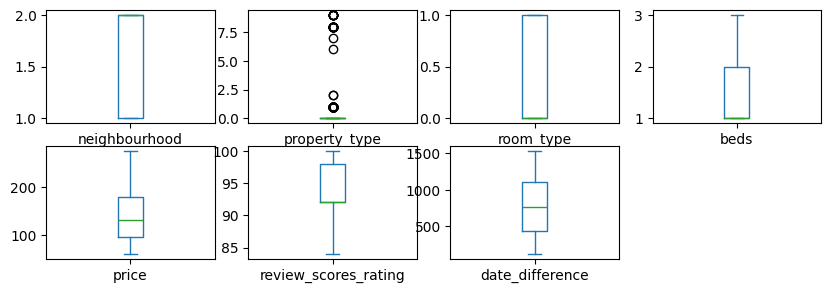

In [95]:
# box plot to visualize how the capping has handled the outliers
new_df.plot(kind='box', subplots=True,figsize=(10,5),layout=(3,4))
plt.show()

In [96]:
# Select our target and features
X = new_df.drop(['price'], axis = 1) #features excluding our target
y = new_df['price'] #target

In [97]:
X.head()

,neighbourhood,property_type,room_type,beds,review_scores_rating,date_difference
3044,1,0,0,2.0,100.000000,1532
3045,1,0,0,1.0,92.050565,1532
3046,2,0,0,3.0,100.000000,1532
3048,2,0,0,1.0,98.000000,1532
3050,1,0,1,1.0,95.000000,1532


After capping between the 10th and 90th percentiles, the outliers for most features has been handled. The property_type still has outliers.

### Scaling the features

In [98]:
# Initialize the scaler
scaler = StandardScaler()

In [99]:
X = scaler.fit_transform(X)

In [100]:
X.shape, y.shape

((14752, 6), (14752,))

### Splitting the train and test data

In [101]:
# Splitting our dataset our dataset for testing and training
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [102]:
# initializing the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [103]:
# making predictions
y_pred = model.predict(X_test)

In [104]:
# comparing predicted vs actual values
price = {'y_true':y_test,'y_pred':y_pred}
pd.DataFrame(price)

,y_true,y_pred
27150,115,79.041025
4283,215,170.794596
27113,260,107.927427
13242,85,80.602667
19174,100,182.661160
...,...,...
8775,169,143.893582
21306,75,109.088330
19036,100,122.530566
3780,119,158.425986


In [105]:
# perfomance evaluation
mse = mean_squared_error(y_test, y_pred)
mse

np.float64(1700.3613227409828)

In [106]:
r2 = r2_score(y_test, y_pred)
r2

0.44465666561513517

### Visualiazation of actual vs predicted

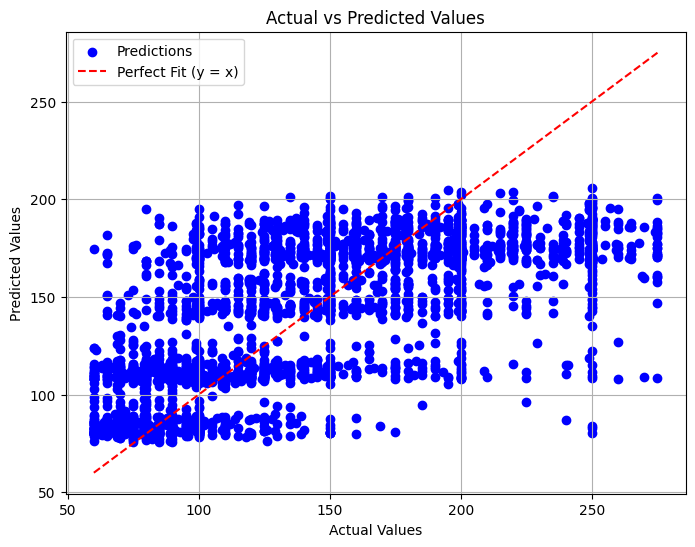

In [107]:
# Plot actual vs predicted  values
# Scatter plot to compare actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color="blue", label="Predictions")
plt.plot(
    [min(y_test), max(y_test)],
    [min(y_test), max(y_test)],
    color="red",
    linestyle="--",
    label="Perfect Fit (y = x)",
)

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

In [38]:
# model improvement tips

# try different models
# try ensemble learning